# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


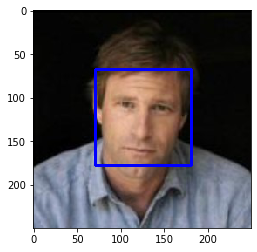

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)
* Percent of first 100 images of ```human_files_short``` with detected human face: 0.96
* Percent of first 100 images of ```dog_files_short``` with detected human face: 0.18

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

human_percent = 0
dog_percent = 0
for human_file, dog_file in tqdm(zip(human_files_short, dog_files_short)):
    if face_detector(human_file):
        human_percent += 1
    if face_detector(dog_file):
        dog_percent += 1
        
print('Percent of first 100 images of human_files with detected human face: {}'
      .format(human_percent / 100))
print('Percent of first 100 images of dog_files with detected human face: {}'
      .format(dog_percent / 100))

100it [00:10,  9.60it/s]


Percent of first 100 images of human_files with detected human face: 0.96
Percent of first 100 images of dog_files with detected human face: 0.18


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

### Optional Face Detection with dlib ###

In [5]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.
import dlib
import dlib.cuda as cuda

# Use GPU if available
if cuda.get_num_devices() > 0:
    dlib.DLIB_USE_CUDA = True

Number of faces detected: 1


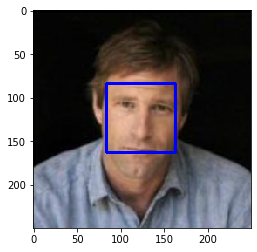

In [6]:
# Face detector from dlib library
dnnFaceDetector = dlib.cnn_face_detection_model_v1('dlib_cnn/mmod_human_face_detector.dat')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = dnnFaceDetector(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for face in faces:
    x1 = face.rect.left()
    y1 = face.rect.top()
    x2 = face.rect.right()
    y2 = face.rect.bottom()
    # add bounding box to color image
    cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

In [7]:
# returns "True" if face is detected in image stored at img_path
def dnn_face_detector(img_path):
    '''
    returns "True" if face is detected in image stored at img_path
    
    Inputs:
        img_path: path to image file to look for face in
        
    Outputs:
        returns True if face is face is detected
    '''
    
    img = cv2.imread(img_path)
    # Printing to determine size of image that will fit into memory     
    dimensions = img.shape
    # print('File: {}\twidth: {}\theight: {}'.format(img_path,dimensions[1],dimensions[0]))
    if dimensions[1] > 1024 or dimensions[0] > 768:
        dim = (1024, 768)
        img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    faces = dnnFaceDetector(gray)
    return len(faces) > 0

#### Evaluate performance of dlib face detector

In [8]:
# Evaluate performance of dlib face detector
dnn_human_percent = 0
dnn_dog_percent = 0
for human_file, dog_file in tqdm(zip(human_files_short, dog_files_short)):
    if dnn_face_detector(human_file):
        dnn_human_percent += 1
    if dnn_face_detector(dog_file):
        dnn_dog_percent += 1
        
print('Percent of first 100 images of human_files with detected human face: {}'
      .format(dnn_human_percent / 100))
print('Percent of first 100 images of dog_files with detected human face: {}'
      .format(dnn_dog_percent / 100))

100it [00:03, 29.01it/s]


Percent of first 100 images of human_files with detected human face: 1.0
Percent of first 100 images of dog_files with detected human face: 0.02


#### Assess the Human Face Detector for Another Model
Performance of ```dlib.cnn_face_detection_model_v1('dlib_cnn/mmod_human_face_detector.dat')```
* Percent of first 100 images of ```human_files_short``` with detected human face: 1.0
* Percent of first 100 images of ```dog_files_short``` with detected human face: 0.02

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [9]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()
    
print(use_cuda)

True


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [10]:
from PIL import Image
from torch.autograd import Variable
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    # Help from:
    # https://discuss.pytorch.org/t/how-to-classify-single-image-using-loaded-net/1411
    
    # Normalization vector below taken from pytorch documentation
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
    loader = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        normalize,
    ])
    img = Image.open(img_path)
    img = loader(img).float()
    img = Variable(img, requires_grad=False)
    img = img.unsqueeze(0)
    if use_cuda:
        img = img.cuda()
    
    pred = VGG16(img)
    max_idx = torch.argmax(pred)
    
    return int(max_idx) # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [11]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    '''
    returns "True" if dog is detected in image stored at img_path
    
    Inputs:
        img_path: path to image file to look for face in
        
    Outputs:
        returns True if dog is face is detected
    '''
    ## TODO: Complete the function.
    idx = VGG16_predict(img_path)
    return idx in range(151, 269) # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
* Percent of first 100 images of ```human_files_short``` that detected dogs: 0.0
* Percent of first 100 images of ```dog_files_short``` that detected dogs: 0.94

In [12]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

# Making this a function for reuse
def assess_short(f, human_files, dog_files):
    '''
    Making a function to assess the performance of the detector
    Prints percentage of human and dog images detected
    
    Args:
        f: detector function
        human_files: list of human files to evaluate performance on
        dog_files: list of dog files to evaluate performance on
        
    Returns:
        None
    '''
    
    human_percent = 0
    dog_percent = 0
    for human_file, dog_file in tqdm(zip(human_files, dog_files)):
        if f(human_file):
            human_percent += 1
        if f(dog_file):
            dog_percent += 1

    print('Percent of first 100 images of human_files that detected dogs: {}'
          .format(human_percent / 100))
    print('Percent of first 100 images of dog_files that detected dogs: {}'
          .format(dog_percent / 100))
    
    return None
    
assess_short(dog_detector, human_files_short, dog_files_short)

100it [00:04, 21.63it/s]


Percent of first 100 images of human_files that detected dogs: 0.0
Percent of first 100 images of dog_files that detected dogs: 0.94


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

### Optional Dog Detection with resnext50_32x4d

__Performance:__ 
* Percent of first 100 images of ```human_files_short``` that detected dogs: 0.0
* Percent of first 100 images of ```dog_files_short``` that detected dogs: 0.94

In [17]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

# Trying resnext50_32_4d

# define resnext50_32x4d model
resnext = models.resnext50_32x4d(pretrained=True)

# move model to GPU if CUDA is available
if use_cuda:
    resnext = resnext.cuda()

In [18]:
# Create a copy of VGG16_predict except it takes a model as an
# argument as well

def model_predict(model,img_path):
    '''
    Args:
        model: model to use for prediction
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
    loader = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        normalize,
    ])
    img = Image.open(img_path)
    img = loader(img).float()
    img = Variable(img, requires_grad=False)
    img = img.unsqueeze(0)
    if use_cuda:
        img = img.cuda()
    
    pred = model(img)
    max_idx = torch.argmax(pred)
    
    return int(max_idx) # predicted class index

def dog_detector_v2(model, img_path):
    ## TODO: Complete the function.
    idx = VGG16_predict(img_path)
    return idx in range(151, 269) # true/false

In [20]:
f = lambda x: dog_detector_v2(resnext,x)
assess_short(f,human_files_short,dog_files_short)

100it [00:04, 24.08it/s]


Percent of first 100 images of human_files that detected dogs: 0.0
Percent of first 100 images of dog_files that detected dogs: 0.94


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [1]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

import os
import numpy as np
import torch
import torchvision.models as model
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch.nn as nn
%matplotlib inline

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

use_cuda = torch.cuda.is_available()
print('Use CUDA:',use_cuda)

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
# Try batch size of 1
batch_size = 20
# Number of classes
num_classes = 133

# Set directory to where dog images are
# data_dir = '/data/dog_images'
data_dir = 'dogImages'

train_dir = os.path.join(data_dir,'train/')
valid_dir = os.path.join(data_dir,'valid/')
test_dir = os.path.join(data_dir,'test/')

# Using normalization from exercises
normalize = transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
# normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

resize_size = 512
train_data_transform = transforms.Compose([transforms.Resize((resize_size, resize_size)),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.RandomRotation(10),
                                     transforms.ToTensor(),
                                     normalize,])


test_data_transform = transforms.Compose([transforms.Resize((resize_size, resize_size)),
                                          transforms.ToTensor(),
                                          normalize])

# Get the data
train_data = datasets.ImageFolder(train_dir, transform=train_data_transform)
valid_data = datasets.ImageFolder(valid_dir, transform=test_data_transform)
test_data = datasets.ImageFolder(test_dir, transform=test_data_transform)

# Create the data loaders
train_loader = torch.utils.data.DataLoader(train_data,
                                           shuffle=True,
                                           batch_size=batch_size,
                                           num_workers=num_workers,
                                           pin_memory=False)
valid_loader = torch.utils.data.DataLoader(valid_data, 
                                           batch_size=batch_size,
                                           num_workers=num_workers,
                                           pin_memory=False) 
test_loader = torch.utils.data.DataLoader(test_data, 
                                          batch_size=batch_size, 
                                          num_workers=num_workers, 
                                          pin_memory=False)

loaders_scratch = {'train': train_loader,
                   'valid': valid_loader,
                   'test': test_loader,}

Use CUDA: True


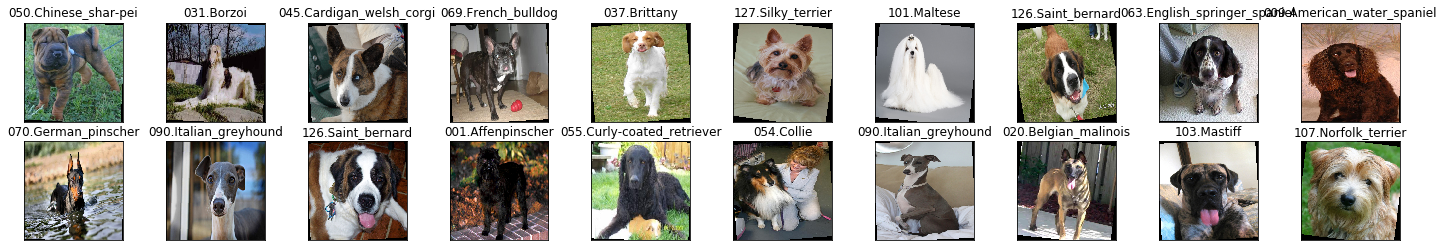

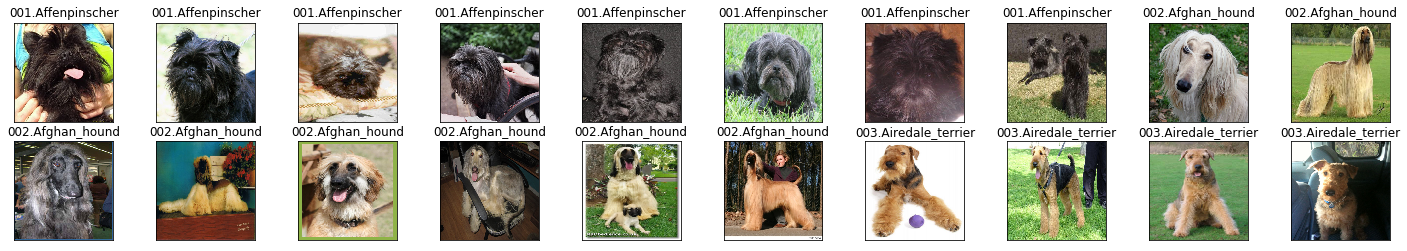

In [2]:
# obtain one batch of training images
dataiter = iter(loaders_scratch['train'])
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(train_data.classes[labels[idx]])
    
# obtain one batch of training images
dataiter = iter(loaders_scratch['test'])
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(train_data.classes[labels[idx]])

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
* Resized images using torchvision.transforms.resize to a fixed square size which was chosen to be 512. Default interpolation parameters were used from the resize method, so according to the documentation, a default bi-linear interpolation from the PIL library is used to resize the image. Since the input images have variable size, and are generally rectangular, the effect is to stretch the images. When experimenting with various architectures, originally 224 x 224 inputs were used similiar to the available pre-trained models. However, because the network architecture is much smaller than the state-of-the-art models, this input size was insufficient to get any performance increase beyond random guessing over 100 iterations in the architectures that were being experimented with. Thus, a larger input size was chosen, and a size of 512 x 512 achieved the required performance of at least 10% accuracy on the test set (see 11% below).
* Two random transformation were used on the training set: random horizontal flips with default parameter of p=0.5 and random rotations of 10 degrees. Augmentation was used since the training set is not that large and even with these transformation, overfitting to the training set occurred rapidly. Since the required performance was achieved, no further tweaking was done, but further augmentation is desired for higher performance.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [3]:
import torch.nn as nn
import torch.nn.functional as F

# # define the CNN architecture
# class Net(nn.Module):
#     ### TODO: choose an architecture, and complete the class
    


# define the CIFAR Example architecture
# Using different feature sizes
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # convolutional layer (sees 512x512x3 image tensor)
        self.conv1 = nn.Conv2d(3, 8, 3, padding=1)
        # convolutional layer (sees 128x128x16 tensor)
        self.conv2 = nn.Conv2d(8, 16, 3, padding=1)
        # convolutional layer (sees 32x32x32 tensor)
        self.conv3 = nn.Conv2d(16, 32, 3, padding=1)
        # max pooling layer
        self.pool = nn.MaxPool2d(4, 4)
        # linear layer (64 * 128 * 128 -> 500)
        self.fc1 = nn.Linear(32 * 8 * 8, 1024)
        # linear layer (500 -> 10)
        self.fc2 = nn.Linear(1024, num_classes)
        # dropout layer (p=0.25)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        # flatten image input
        x = x.view(-1, 32 * 8 * 8)
        # add dropout layer
        x = self.dropout(x)
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add 2nd hidden layer, with relu activation function
        x = self.fc2(x)
        return x


#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
print(model_scratch) 

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


print(count_parameters(model_scratch))

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

Net(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=133, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)
2240533


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

In the process of trying to achieve the required performance, different architectures were attempted. The first architecture took the model from the CIFAR example. This was mostly just to make sure all the preprocessing was done correctly and did not have any errors. As was expected, this did not work well - after 100 iterations the performance was essentially equivalent to random guessing. Next, architectures similar to the VGG models were attempted with multiple convolutional layers in a row, then a max-pooling layer and repeat several times, and then into several linear layers. ReLU activations functions were used between all layers and dropout was added between linear layers. Due to resources and computation time, the attempted model was much smaller than the VGG models, and accordinly performance was poor.

Because of this, a larger input feature size was attempted to make up for the size of the model in comparison to, for example, VGG. The original CIFAR architecture was taken but with a 512 x 512 input feature size. The model quickly began to over-fit the training set, but not before achieving the minimum required performanace of 10% correct classification on the test set (see below).

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [4]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
# optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.3)
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [5]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

torch.autograd.set_detect_anomaly(True)

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in tqdm(range(1, n_epochs+1)):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        correct = 0.
        total = 0.
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            train_loss += loss.item()*data.size(0)
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss += loss.item()*data.size(0)
            # convert output probabilities to predicted class
            pred = output.data.max(1, keepdim=True)[1]
            # compare predictions to true label
            correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
            total += data.size(0)

            
        # calculate average losses
        # Using computation from CIFAR10 example
        train_loss = train_loss/len(train_loader.sampler)
        valid_loss = valid_loss/len(valid_loader.sampler)
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        print('\nValidation Accuracy: %2d%% (%2d/%2d)' % (100. * correct / total, correct, total))
        
        ## TODO: save the model if validation loss has decreased
        # Taking from CIFAR10 example
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model


# train the model
model_scratch = train(100, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

Epoch: 1 	Training Loss: 4.887346 	Validation Loss: 4.883823

Validation Accuracy:  0% ( 5/835)
Validation loss decreased (inf --> 4.883823).  Saving model ...


  1%|▊                                                                              | 1/100 [03:04<5:04:56, 184.81s/it]

Epoch: 2 	Training Loss: 4.880122 	Validation Loss: 4.876011

Validation Accuracy:  1% ( 9/835)
Validation loss decreased (4.883823 --> 4.876011).  Saving model ...


  2%|█▌                                                                             | 2/100 [06:09<5:01:35, 184.65s/it]

Epoch: 3 	Training Loss: 4.872354 	Validation Loss: 4.869164

Validation Accuracy:  1% (11/835)
Validation loss decreased (4.876011 --> 4.869164).  Saving model ...


  3%|██▎                                                                            | 3/100 [09:13<4:58:10, 184.44s/it]

Epoch: 4 	Training Loss: 4.868564 	Validation Loss: 4.866183

Validation Accuracy:  1% ( 9/835)
Validation loss decreased (4.869164 --> 4.866183).  Saving model ...


  4%|███▏                                                                           | 4/100 [12:17<4:55:16, 184.54s/it]

Epoch: 5 	Training Loss: 4.864956 	Validation Loss: 4.864209

Validation Accuracy:  1% (11/835)
Validation loss decreased (4.866183 --> 4.864209).  Saving model ...


  5%|███▉                                                                           | 5/100 [15:20<4:51:26, 184.07s/it]

Epoch: 6 	Training Loss: 4.863134 	Validation Loss: 4.861659

Validation Accuracy:  2% (19/835)
Validation loss decreased (4.864209 --> 4.861659).  Saving model ...


  6%|████▋                                                                          | 6/100 [18:26<4:48:57, 184.45s/it]

Epoch: 7 	Training Loss: 4.860134 	Validation Loss: 4.857003

Validation Accuracy:  2% (19/835)
Validation loss decreased (4.861659 --> 4.857003).  Saving model ...


  7%|█████▌                                                                         | 7/100 [21:30<4:45:50, 184.41s/it]

Epoch: 8 	Training Loss: 4.853353 	Validation Loss: 4.845726

Validation Accuracy:  2% (18/835)
Validation loss decreased (4.857003 --> 4.845726).  Saving model ...


  8%|██████▎                                                                        | 8/100 [24:34<4:42:33, 184.28s/it]

Epoch: 9 	Training Loss: 4.829859 	Validation Loss: 4.798619

Validation Accuracy:  2% (22/835)
Validation loss decreased (4.845726 --> 4.798619).  Saving model ...


  9%|███████                                                                        | 9/100 [27:39<4:39:41, 184.41s/it]

Epoch: 10 	Training Loss: 4.742163 	Validation Loss: 4.671598

Validation Accuracy:  1% (16/835)
Validation loss decreased (4.798619 --> 4.671598).  Saving model ...


 10%|███████▊                                                                      | 10/100 [30:44<4:37:01, 184.68s/it]

Epoch: 11 	Training Loss: 4.631483 	Validation Loss: 4.610075

Validation Accuracy:  4% (35/835)
Validation loss decreased (4.671598 --> 4.610075).  Saving model ...


 11%|████████▌                                                                     | 11/100 [33:48<4:33:42, 184.53s/it]

Epoch: 12 	Training Loss: 4.551190 	Validation Loss: 4.544941

Validation Accuracy:  3% (33/835)
Validation loss decreased (4.610075 --> 4.544941).  Saving model ...


 12%|█████████▎                                                                    | 12/100 [36:53<4:30:46, 184.61s/it]

Epoch: 13 	Training Loss: 4.490722 	Validation Loss: 4.504215

Validation Accuracy:  3% (32/835)
Validation loss decreased (4.544941 --> 4.504215).  Saving model ...


 13%|██████████▏                                                                   | 13/100 [39:58<4:27:47, 184.68s/it]

Epoch: 14 	Training Loss: 4.424118 	Validation Loss: 4.472399

Validation Accuracy:  3% (32/835)
Validation loss decreased (4.504215 --> 4.472399).  Saving model ...


 14%|██████████▉                                                                   | 14/100 [43:03<4:24:56, 184.84s/it]

Epoch: 15 	Training Loss: 4.337186 	Validation Loss: 4.369283

Validation Accuracy:  5% (49/835)
Validation loss decreased (4.472399 --> 4.369283).  Saving model ...


 15%|███████████▋                                                                  | 15/100 [46:07<4:21:40, 184.71s/it]

Epoch: 16 	Training Loss: 4.235573 	Validation Loss: 4.309285

Validation Accuracy:  6% (51/835)
Validation loss decreased (4.369283 --> 4.309285).  Saving model ...


 16%|████████████▍                                                                 | 16/100 [49:11<4:18:15, 184.47s/it]

Epoch: 17 	Training Loss: 4.135387 	Validation Loss: 4.226816

Validation Accuracy:  7% (60/835)
Validation loss decreased (4.309285 --> 4.226816).  Saving model ...


 17%|█████████████▎                                                                | 17/100 [52:15<4:15:01, 184.35s/it]

Epoch: 18 	Training Loss: 4.059184 	Validation Loss: 4.177577

Validation Accuracy:  8% (68/835)
Validation loss decreased (4.226816 --> 4.177577).  Saving model ...


 18%|██████████████                                                                | 18/100 [55:21<4:12:35, 184.82s/it]

Epoch: 19 	Training Loss: 3.988299 	Validation Loss: 4.170470

Validation Accuracy:  7% (63/835)
Validation loss decreased (4.177577 --> 4.170470).  Saving model ...


 19%|██████████████▊                                                               | 19/100 [58:26<4:09:35, 184.88s/it]

Epoch: 20 	Training Loss: 3.919046 	Validation Loss: 4.098548

Validation Accuracy:  7% (66/835)
Validation loss decreased (4.170470 --> 4.098548).  Saving model ...


 20%|███████████████▏                                                            | 20/100 [1:01:32<4:06:46, 185.09s/it]

Epoch: 21 	Training Loss: 3.842117 	Validation Loss: 4.086998

Validation Accuracy:  8% (72/835)
Validation loss decreased (4.098548 --> 4.086998).  Saving model ...


 21%|███████████████▉                                                            | 21/100 [1:04:37<4:03:36, 185.02s/it]

Epoch: 22 	Training Loss: 3.778635 	Validation Loss: 4.050601

Validation Accuracy: 10% (84/835)
Validation loss decreased (4.086998 --> 4.050601).  Saving model ...


 22%|████████████████▋                                                           | 22/100 [1:07:41<4:00:20, 184.88s/it]

Epoch: 23 	Training Loss: 3.703261 	Validation Loss: 4.032673

Validation Accuracy: 10% (87/835)
Validation loss decreased (4.050601 --> 4.032673).  Saving model ...


 23%|█████████████████▍                                                          | 23/100 [1:10:46<3:57:01, 184.69s/it]

Epoch: 24 	Training Loss: 3.630506 	Validation Loss: 4.042184

Validation Accuracy:  9% (81/835)


 24%|██████████████████▏                                                         | 24/100 [1:13:51<3:54:04, 184.80s/it]

Epoch: 25 	Training Loss: 3.553768 	Validation Loss: 4.029105

Validation Accuracy:  9% (81/835)
Validation loss decreased (4.032673 --> 4.029105).  Saving model ...


 25%|███████████████████                                                         | 25/100 [1:16:56<3:51:15, 185.00s/it]

Epoch: 26 	Training Loss: 3.457088 	Validation Loss: 4.023867

Validation Accuracy: 10% (86/835)
Validation loss decreased (4.029105 --> 4.023867).  Saving model ...


 26%|███████████████████▊                                                        | 26/100 [1:20:01<3:47:59, 184.85s/it]

Epoch: 27 	Training Loss: 3.367597 	Validation Loss: 4.075024

Validation Accuracy: 10% (85/835)


 27%|████████████████████▌                                                       | 27/100 [1:23:05<3:44:41, 184.68s/it]

Epoch: 28 	Training Loss: 3.280658 	Validation Loss: 4.045130

Validation Accuracy: 10% (87/835)


 28%|█████████████████████▎                                                      | 28/100 [1:26:09<3:41:26, 184.53s/it]

Epoch: 29 	Training Loss: 3.180372 	Validation Loss: 3.989475

Validation Accuracy:  9% (82/835)
Validation loss decreased (4.023867 --> 3.989475).  Saving model ...


 29%|██████████████████████                                                      | 29/100 [1:29:14<3:38:32, 184.69s/it]

Epoch: 30 	Training Loss: 3.090036 	Validation Loss: 4.037923

Validation Accuracy: 11% (96/835)


 30%|██████████████████████▊                                                     | 30/100 [1:32:19<3:35:37, 184.82s/it]

Epoch: 31 	Training Loss: 2.970482 	Validation Loss: 4.062625

Validation Accuracy: 11% (94/835)


 31%|███████████████████████▌                                                    | 31/100 [1:35:24<3:32:29, 184.77s/it]

Epoch: 32 	Training Loss: 2.883572 	Validation Loss: 4.076990

Validation Accuracy: 10% (87/835)


 32%|████████████████████████▎                                                   | 32/100 [1:38:29<3:29:24, 184.78s/it]

Epoch: 33 	Training Loss: 2.770385 	Validation Loss: 4.055827

Validation Accuracy: 11% (99/835)


 33%|█████████████████████████                                                   | 33/100 [1:41:34<3:26:38, 185.05s/it]

Epoch: 34 	Training Loss: 2.666899 	Validation Loss: 4.125384

Validation Accuracy: 12% (102/835)


 34%|█████████████████████████▊                                                  | 34/100 [1:44:38<3:23:09, 184.70s/it]

Epoch: 35 	Training Loss: 2.526411 	Validation Loss: 4.273011

Validation Accuracy: 10% (91/835)


 35%|██████████████████████████▌                                                 | 35/100 [1:47:43<3:20:09, 184.76s/it]

Epoch: 36 	Training Loss: 2.409073 	Validation Loss: 4.186658

Validation Accuracy: 11% (100/835)


 36%|███████████████████████████▎                                                | 36/100 [1:50:47<3:16:55, 184.62s/it]

Epoch: 37 	Training Loss: 2.301413 	Validation Loss: 4.231277

Validation Accuracy: 11% (100/835)


 37%|████████████████████████████                                                | 37/100 [1:53:51<3:13:35, 184.37s/it]

Epoch: 38 	Training Loss: 2.163487 	Validation Loss: 4.303125

Validation Accuracy: 12% (101/835)


 38%|████████████████████████████▉                                               | 38/100 [1:56:55<3:10:28, 184.34s/it]

Epoch: 39 	Training Loss: 2.069610 	Validation Loss: 4.358930

Validation Accuracy: 12% (106/835)


 39%|█████████████████████████████▋                                              | 39/100 [2:00:01<3:07:44, 184.67s/it]

Epoch: 40 	Training Loss: 1.938583 	Validation Loss: 4.496078

Validation Accuracy: 11% (97/835)


 40%|██████████████████████████████▍                                             | 40/100 [2:03:05<3:04:25, 184.43s/it]

KeyboardInterrupt: 

__Note__: Terminated the training early as it appeared that over-fitting was occuring. Did not re-run as the minimum performance of 10% was achieved (see below).

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [6]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 4.487329


Test Accuracy: 11% (97/836)


### Performance

__Test Accuracy:__ 11% (97/836)

---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

__Note:__ Used same loaders as in Step 3. Used the normalization vector specified in the pytorch documentation.

In [9]:
# Used same loaders at Step 3

## TODO: Specify data loaders
import os
# import numpy as np
import torch
import torchvision.models as model
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch.nn as nn
%matplotlib inline

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

use_cuda = torch.cuda.is_available()
print('Use CUDA:',use_cuda)

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
# Try batch size of 1
batch_size = 20

# data_dir = '/data/dog_images'
data_dir = 'dogImages'
# human_files = np.array(glob("/data/lfw/*/*"))
# dog_files = np.array(glob("/data/dog_images/*/*/*"))

train_dir = os.path.join(data_dir,'train/')
valid_dir = os.path.join(data_dir,'valid/')
test_dir = os.path.join(data_dir,'test/')

# normalize = transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

resize_size = 224

train_data_transform = transforms.Compose([transforms.Resize((resize_size,resize_size)),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.RandomRotation(10),
                                     transforms.ToTensor(),
                                     normalize,])

# train_data_transform = transforms.Compose([transforms.Resize((resize_size,resize_size)),
#                                      transforms.RandomHorizontalFlip(),
#                                      transforms.RandomRotation(10),
#                                      transforms.ToTensor(),
#                                      normalize])

test_data_transform = transforms.Compose([transforms.Resize((resize_size, resize_size)),
                                          transforms.ToTensor(),
                                          normalize])

# Get the data
train_data = datasets.ImageFolder(train_dir, transform=train_data_transform)
valid_data = datasets.ImageFolder(valid_dir, transform=test_data_transform)
test_data = datasets.ImageFolder(test_dir, transform=test_data_transform)

# Create the data loaders
train_loader = torch.utils.data.DataLoader(train_data,
                                           shuffle=True,
                                           batch_size=batch_size,
                                           num_workers=num_workers,
                                           pin_memory=False)
valid_loader = torch.utils.data.DataLoader(valid_data, 
                                           batch_size=batch_size,
                                           num_workers=num_workers,
                                           pin_memory=False) 
test_loader = torch.utils.data.DataLoader(test_data, 
                                          batch_size=batch_size, 
                                          num_workers=num_workers, 
                                          pin_memory=False)

loaders_transfer = {'train': train_loader,
                   'valid': valid_loader,
                   'test': test_loader,}

Use CUDA: True


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

__Model Used:__ Using resnet152 for transfer learning.

In [23]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
## TODO: Specify data loaders

model_transfer = models.resnet152(pretrained=True)

for param in model_transfer.parameters():
    param.requires_grad = False

# resnet152 model
print(model_transfer)

# Changing last linear layer for transfer learning
model_transfer.fc.rquired_grad = True
n_inputs = 2048
num_classes = 133
last_layer = nn.Linear(2048, num_classes)
model_transfer.fc = last_layer

# move model to GPU if CUDA is available

if use_cuda:
    model_transfer = model_transfer.cuda()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

)


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ The resnet152 model is quite large, and the first thought was to just change the final linear layer. Thus, the original final fully-connected layer was removed an replaced with a fully connected layer of output dimension 133 - the number of dog breeds in the data set. With this one change, the model was tested and achieved the required performance, specifically a test accuracy of 82%. Thus, no further experimentation was done on modifying the resnet152 model for transfer learning.

For transforming the input images, the normalization vector was chosen per the torchvision documentation and the size of the input image was resized to the required 224 x 224. No random resize or random crop was used on the training set. Overfitting was observed, but since the required performance was achieved, no further experimentation was performed.

The resnet152 model was chosen because it seemed to have great performance on the ImageNet data set. Given it's performance on the ImageNet data set, it was hoped that it's internal learned representations would work well for the dog breed classification problem. Indeed, this seems to be the case as 82% test accuracy was achieved by only changing the last layer for transfer learning.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [11]:
import torch.optim as optim

### TODO: select loss function
criterion_transfer = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_transfer = optim.Adam(model_transfer.fc.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [12]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in tqdm(range(1, n_epochs+1)):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            train_loss += loss.item()*data.size(0)
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss += loss.item()*data.size(0)

            
        # calculate average losses
        # Using computation from CIFAR10 example
        train_loss = train_loss/len(train_loader.sampler)
        valid_loss = valid_loss/len(valid_loader.sampler)
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        # Taking from CIFAR10 example
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model


# train the model
model_transfer = train(100, loaders_transfer, model_transfer, optimizer_transfer, 
                      criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pt'))


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

Epoch: 1 	Training Loss: 1.883328 	Validation Loss: 0.674730
Validation loss decreased (inf --> 0.674730).  Saving model ...



  1%|▊                                                                              | 1/100 [02:56<4:51:57, 176.94s/it]

Epoch: 2 	Training Loss: 0.670965 	Validation Loss: 0.560675
Validation loss decreased (0.674730 --> 0.560675).  Saving model ...



  2%|█▌                                                                             | 2/100 [05:55<4:50:01, 177.57s/it]

Epoch: 3 	Training Loss: 0.515471 	Validation Loss: 0.563785



  3%|██▎                                                                            | 3/100 [08:54<4:47:43, 177.98s/it]

Epoch: 4 	Training Loss: 0.446869 	Validation Loss: 0.610583



  4%|███▏                                                                           | 4/100 [11:54<4:45:17, 178.31s/it]

Epoch: 5 	Training Loss: 0.398536 	Validation Loss: 0.513893
Validation loss decreased (0.560675 --> 0.513893).  Saving model ...



  5%|███▉                                                                           | 5/100 [14:53<4:42:55, 178.68s/it]

Epoch: 6 	Training Loss: 0.360510 	Validation Loss: 0.528590



  6%|████▋                                                                          | 6/100 [17:52<4:40:17, 178.91s/it]

Epoch: 7 	Training Loss: 0.336399 	Validation Loss: 0.523011



  7%|█████▌                                                                         | 7/100 [20:52<4:37:42, 179.17s/it]

Epoch: 8 	Training Loss: 0.317253 	Validation Loss: 0.491016
Validation loss decreased (0.513893 --> 0.491016).  Saving model ...



  8%|██████▎                                                                        | 8/100 [23:53<4:35:15, 179.51s/it]

Epoch: 9 	Training Loss: 0.299110 	Validation Loss: 0.507958



  9%|███████                                                                        | 9/100 [26:52<4:32:10, 179.45s/it]

Epoch: 10 	Training Loss: 0.277512 	Validation Loss: 0.572425



 10%|███████▊                                                                      | 10/100 [29:52<4:29:30, 179.67s/it]

Epoch: 11 	Training Loss: 0.289474 	Validation Loss: 0.535515



 11%|████████▌                                                                     | 11/100 [32:52<4:26:33, 179.70s/it]

Epoch: 12 	Training Loss: 0.280434 	Validation Loss: 0.581284



 12%|█████████▎                                                                    | 12/100 [35:52<4:23:43, 179.81s/it]

Epoch: 13 	Training Loss: 0.260100 	Validation Loss: 0.598316



 13%|██████████▏                                                                   | 13/100 [38:52<4:20:43, 179.81s/it]

Epoch: 14 	Training Loss: 0.252875 	Validation Loss: 0.625273



 14%|██████████▉                                                                   | 14/100 [41:52<4:17:48, 179.86s/it]

Epoch: 15 	Training Loss: 0.242603 	Validation Loss: 0.543386



 15%|███████████▋                                                                  | 15/100 [44:51<4:14:35, 179.71s/it]

Epoch: 16 	Training Loss: 0.241126 	Validation Loss: 0.613340



 16%|████████████▍                                                                 | 16/100 [47:51<4:11:40, 179.77s/it]

Epoch: 17 	Training Loss: 0.219892 	Validation Loss: 0.618983



 17%|█████████████▎                                                                | 17/100 [50:51<4:08:42, 179.79s/it]

Epoch: 18 	Training Loss: 0.210831 	Validation Loss: 0.648835



 18%|██████████████                                                                | 18/100 [53:51<4:05:51, 179.90s/it]

Epoch: 19 	Training Loss: 0.198970 	Validation Loss: 0.619581



 19%|██████████████▊                                                               | 19/100 [56:50<4:02:42, 179.79s/it]

Epoch: 20 	Training Loss: 0.200719 	Validation Loss: 0.635645



 20%|███████████████▌                                                              | 20/100 [59:50<3:59:47, 179.85s/it]

Epoch: 21 	Training Loss: 0.203910 	Validation Loss: 0.682885



 21%|███████████████▉                                                            | 21/100 [1:02:51<3:56:55, 179.94s/it]

Epoch: 22 	Training Loss: 0.186678 	Validation Loss: 0.661562



 22%|████████████████▋                                                           | 22/100 [1:05:50<3:53:47, 179.84s/it]

Epoch: 23 	Training Loss: 0.184466 	Validation Loss: 0.769673



 23%|█████████████████▍                                                          | 23/100 [1:08:49<3:50:30, 179.62s/it]

Epoch: 24 	Training Loss: 0.176595 	Validation Loss: 0.658920



 24%|██████████████████▏                                                         | 24/100 [1:11:49<3:47:33, 179.65s/it]

Epoch: 25 	Training Loss: 0.193819 	Validation Loss: 0.755594



 25%|███████████████████                                                         | 25/100 [1:14:49<3:44:34, 179.66s/it]

Epoch: 26 	Training Loss: 0.177058 	Validation Loss: 0.772024



 26%|███████████████████▊                                                        | 26/100 [1:17:48<3:41:25, 179.53s/it]

Epoch: 27 	Training Loss: 0.177093 	Validation Loss: 0.715554



 27%|████████████████████▌                                                       | 27/100 [1:20:48<3:38:28, 179.57s/it]

Epoch: 28 	Training Loss: 0.173407 	Validation Loss: 0.647158



 28%|█████████████████████▎                                                      | 28/100 [1:23:47<3:35:31, 179.61s/it]

Epoch: 29 	Training Loss: 0.182078 	Validation Loss: 0.696584



 29%|██████████████████████                                                      | 29/100 [1:26:46<3:32:16, 179.39s/it]

Epoch: 30 	Training Loss: 0.164157 	Validation Loss: 0.734841



 30%|██████████████████████▊                                                     | 30/100 [1:29:46<3:29:31, 179.60s/it]

Epoch: 31 	Training Loss: 0.180902 	Validation Loss: 0.752395



 31%|███████████████████████▌                                                    | 31/100 [1:32:46<3:26:28, 179.54s/it]

Epoch: 32 	Training Loss: 0.161291 	Validation Loss: 0.737906



 32%|████████████████████████▎                                                   | 32/100 [1:35:46<3:23:35, 179.64s/it]

Epoch: 33 	Training Loss: 0.149138 	Validation Loss: 0.828793



 33%|█████████████████████████                                                   | 33/100 [1:38:45<3:20:27, 179.51s/it]

Epoch: 34 	Training Loss: 0.187655 	Validation Loss: 0.791829



 34%|█████████████████████████▊                                                  | 34/100 [1:41:44<3:17:25, 179.48s/it]

Epoch: 35 	Training Loss: 0.157794 	Validation Loss: 0.701094



 35%|██████████████████████████▌                                                 | 35/100 [1:44:45<3:14:53, 179.90s/it]

Epoch: 36 	Training Loss: 0.144491 	Validation Loss: 0.841140



 36%|███████████████████████████▎                                                | 36/100 [1:47:45<3:11:47, 179.80s/it]

Epoch: 37 	Training Loss: 0.162062 	Validation Loss: 0.735897



 37%|████████████████████████████                                                | 37/100 [1:50:44<3:08:42, 179.72s/it]

Epoch: 38 	Training Loss: 0.158087 	Validation Loss: 0.760578



 38%|████████████████████████████▉                                               | 38/100 [1:53:44<3:05:37, 179.64s/it]

Epoch: 39 	Training Loss: 0.163214 	Validation Loss: 0.712467



 39%|█████████████████████████████▋                                              | 39/100 [1:56:44<3:02:52, 179.88s/it]

Epoch: 40 	Training Loss: 0.152549 	Validation Loss: 0.786908



 40%|██████████████████████████████▍                                             | 40/100 [1:59:44<2:59:54, 179.90s/it]

Epoch: 41 	Training Loss: 0.152871 	Validation Loss: 0.706201



 41%|███████████████████████████████▏                                            | 41/100 [2:02:44<2:56:52, 179.88s/it]

Epoch: 42 	Training Loss: 0.143009 	Validation Loss: 0.786274



 42%|███████████████████████████████▉                                            | 42/100 [2:05:44<2:53:49, 179.82s/it]

Epoch: 43 	Training Loss: 0.142884 	Validation Loss: 0.767135



 43%|████████████████████████████████▋                                           | 43/100 [2:08:43<2:50:42, 179.69s/it]

Epoch: 44 	Training Loss: 0.136220 	Validation Loss: 0.749620



 44%|█████████████████████████████████▍                                          | 44/100 [2:11:42<2:47:31, 179.48s/it]

KeyboardInterrupt: 

__Note:__ Terminated early since over-fitting was observed.

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [13]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.043479


Test Accuracy: 82% (690/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [ ]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
    loader = transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor(),
        normalize,
    ])
    img = Image.open(img_path)
    img = loader(img).float()
    img = Variable(img, requires_grad=False)
    img = img.unsqueeze(0)
    if use_cuda:
        img = img.cuda()
    
    pred = model_transfer(img)
    max_idx = torch.argmax(pred)
    
    return class_names[int(max_idx)] # predicted class index

In [ ]:
for dog in dog_files_short:
    print(predict_breed_transfer(dog))

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

__Implementation:__ The goal is to output the predicted dog breed whether a dog or a human face is detected. Thus, using the dog and human face detection functions from Step 1 and Step 2, if *either* a dog or human face is detected, the transfer learning model is used to predicted the dog breed. If *neither* a dog *nor* a human face was detected, an exception is raised.

In [ ]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    if dog_detector(img_path) or dnn_face_detector(img_path):
        return predict_breed_transfer(img_path)
    else:
        raise Exception('No dog or human found')

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

In [ ]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)